# Lab: Regression Analysis

### Before you start:

* Read the README.md file
* Comment as much as you can and use the resources (README.md file) 

Happy learning!

## Challenge 1
I work at a coding bootcamp, and I have developed a theory that the younger my students are, the more often they are late to class. In order to test my hypothesis, I have collected some data in the following table:

| StudentID | Age | Tardies |
|--------|-----|------------|
| 1      | 17  | 10         |
| 2      | 51  | 1          |
| 3      | 27  | 5          |
| 4      | 21  | 9         |
| 5      | 36  |  4         |
| 6      | 48  |  2         |
| 7      | 19  |  9         |
| 8      | 26  | 6          |
| 9      | 54  |  0         |
| 10     | 30  |  3         |

Use this command to create a dataframe with the data provided in the table. 
~~~~
student_data = pd.DataFrame({'X': [x_values], 'Y': [y_values]})
~~~~

In [1]:
# Your code here.
import pandas as pd

# Provided data
data = {'StudentID': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
        'Age': [17, 51, 27, 21, 36, 48, 19, 26, 54, 30],
        'Tardies': [10, 1, 5, 9, 4, 2, 9, 6, 0, 3]}

# Create a DataFrame
student_data = pd.DataFrame(data)

Draw a dispersion diagram (scatter plot) for the data.

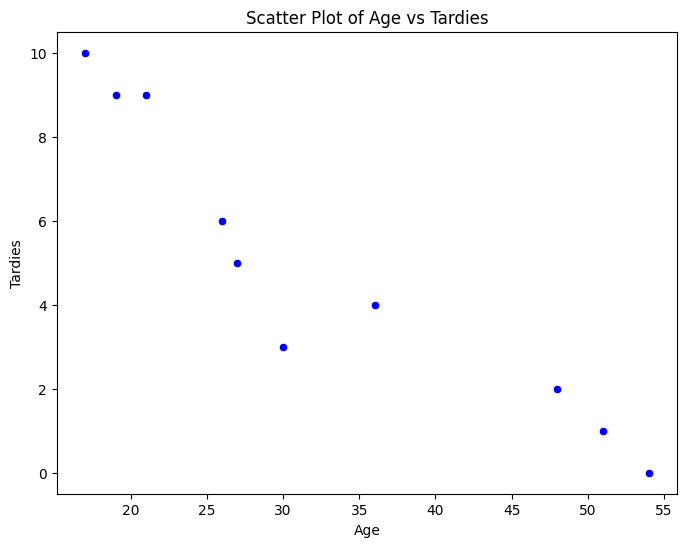

In [17]:

import seaborn as sns
import matplotlib.pyplot as plt

# Your code here.
# Create a scatter plot
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Age', y='Tardies', data=student_data, color='blue')

# Set labels and title
plt.xlabel('Age')
plt.ylabel('Tardies')
plt.title('Scatter Plot of Age vs Tardies')

# Display the plot
plt.show()

Do you see a trend? Can you make any hypotheses about the relationship between age and number of tardies?

In [18]:
# Your response here. 

# From the scatter plot, we can observe a negative trend, suggesting a potential correlation between age and the number of tardies.
# As age increases, the number of tardies generally tends to decrease. 


Calculate the covariance and correlation of the variables in your plot. What is the difference between these two measures? Compare their values. What do they tell you in this case? Add your responses as comments after your code.

In [32]:
# Your response here.
#correlation:
#covariance:

# Calculate covariance matrix
covariance_matrix = student_data[['Age', 'Tardies']].cov()

# Calculate correlation matrix
correlation_matrix = student_data[['Age', 'Tardies']].corr()

# Display covariance matrix
print("Covariance Matrix:")
print(covariance_matrix)

# Display correlation matrix
print("\nCorrelation Matrix:")
print(correlation_matrix)

# The covariance between Age and Tardies is -45.566667. The negative sign indicates a negative relationship,
# supporting the visual observation that younger students tend to have more tardies.

# The correlation coefficient between Age and Tardies is approximately -0.939163. 
# This value is close to -1, indicating a strong negative linear relationship.


Covariance Matrix:
                Age    Tardies
Age      187.655556 -45.566667
Tardies  -45.566667  12.544444

Correlation Matrix:
              Age   Tardies
Age      1.000000 -0.939163
Tardies -0.939163  1.000000


Build a regression model for this data. What will be your outcome variable? What type of regression are you using? Add your responses as comments after your code.

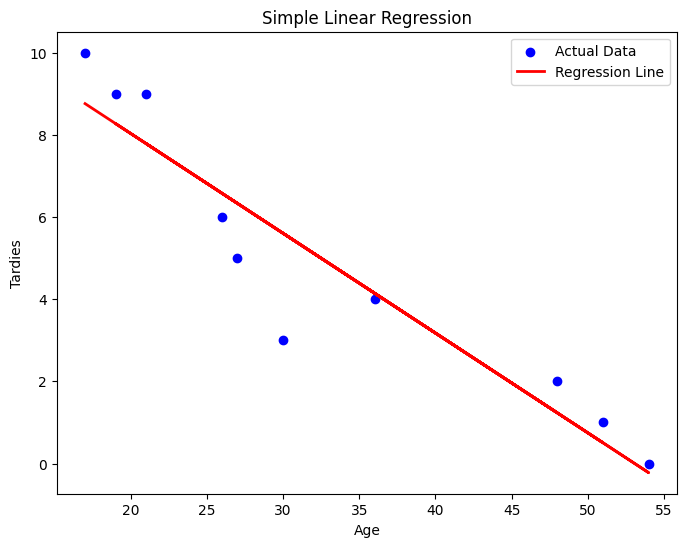

In [45]:
# Your response here.

import numpy as np
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

# Data
X = student_data['Age'].values.reshape(-1, 1)  # Predictor variable (Age)
y = student_data['Tardies'].values  # Outcome variable (Tardies)

# Create and fit the linear regression model
model = LinearRegression()
model.fit(X, y)

# Predictions based on the model
predictions = model.predict(X)

# Plotting the regression line
plt.figure(figsize=(8, 6))
plt.scatter(X, y, color='blue', label='Actual Data')
plt.plot(X, predictions, color='red', linewidth=2, label='Regression Line')
plt.xlabel('Age')
plt.ylabel('Tardies')
plt.title('Simple Linear Regression')
plt.legend()
plt.show()


In [70]:

import statsmodels.api as sm
# Predictor variable (independent variable)
X = student_data['Age']

# Outcome variable (dependent variable)
y = student_data['Tardies']

# Add a constant term to the predictor variable for the intercept
X = sm.add_constant(X)

# Fit the regression model
model = sm.OLS(y, X).fit()

# Print the regression summary
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                Tardies   R-squared:                       0.882
Model:                            OLS   Adj. R-squared:                  0.867
Method:                 Least Squares   F-statistic:                     59.81
Date:                Sat, 06 Jan 2024   Prob (F-statistic):           5.57e-05
Time:                        17:25:49   Log-Likelihood:                -15.622
No. Observations:                  10   AIC:                             35.24
Df Residuals:                       8   BIC:                             35.85
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         12.8888      1.111     11.605      0.0

c:\Users\diana\AppData\Local\Programs\Python\Python312\Lib\site-packages\scipy\stats\_stats_py.py:1806: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


Plot your regression model on your scatter plot.

Interpret the results of your model. What can conclusions can you draw from your model and how confident in these conclusions are you? Can we say that age is a good predictor of tardiness? Add your responses as comments after your code.

In [71]:
# Your response here. 


# - Based on the statistical significance of the Age coefficient and the high R-squared value, we can conclude that there is a significant relationship between Age and Tardies.
# - The negative coefficient for Age indicates that, on average, older students tend to have fewer tardies.

# Confidence in Conclusions:
# - The high R-squared and statistical significance of coefficients provide confidence in the model's ability to explain the relationship.


## Challenge 2
For the second part of this lab, we will use the vehicles.csv data set. You can find a copy of the dataset in the git hub folder. This dataset includes variables related to vehicle characteristics, including the model, make, and energy efficiency standards, as well as each car's CO2 emissions. As discussed in class the goal of this exercise is to predict vehicles' CO2 emissions based on several independent variables. 

In [91]:
# Import any libraries you may need & the data

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt



vehicles = pd.read_csv("C:/users/diana/Documents/Repos/GitHub/lab-regression-analysis/your-code/vehicles.csv")
vehicles.head()


,Make,Model,Year,Engine Displacement,Cylinders,Transmission,Drivetrain,Vehicle Class,Fuel Type,Fuel Barrels/Year,City MPG,Highway MPG,Combined MPG,CO2 Emission Grams/Mile,Fuel Cost/Year
0,AM General,DJ Po Vehicle 2WD,1984,2.5,4.0,Automatic 3-spd,2-Wheel Drive,Special Purpose Vehicle 2WD,Regular,19.388824,18,17,17,522.764706,1950
1,AM General,FJ8c Post Office,1984,4.2,6.0,Automatic 3-spd,2-Wheel Drive,Special Purpose Vehicle 2WD,Regular,25.354615,13,13,13,683.615385,2550
2,AM General,Post Office DJ5 2WD,1985,2.5,4.0,Automatic 3-spd,Rear-Wheel Drive,Special Purpose Vehicle 2WD,Regular,20.600625,16,17,16,555.437500,2100
3,AM General,Post Office DJ8 2WD,1985,4.2,6.0,Automatic 3-spd,Rear-Wheel Drive,Special Purpose Vehicle 2WD,Regular,25.354615,13,13,13,683.615385,2550
4,ASC Incorporated,GNX,1987,3.8,6.0,Automatic 4-spd,Rear-Wheel Drive,Midsize Cars,Premium,20.600625,14,21,16,555.437500,2550


Let's use the following variables for our analysis: Year, Cylinders, Fuel Barrels/Year, Combined MPG, and Fuel Cost/Year. We will use 'CO2 Emission Grams/Mile' as our outcome variable. 

Calculate the correlations between each of these variables and the outcome. Which variable do you think will be the most important in determining CO2 emissions? Which provides the least amount of helpful information for determining CO2 emissions? Add your responses as comments after your code.

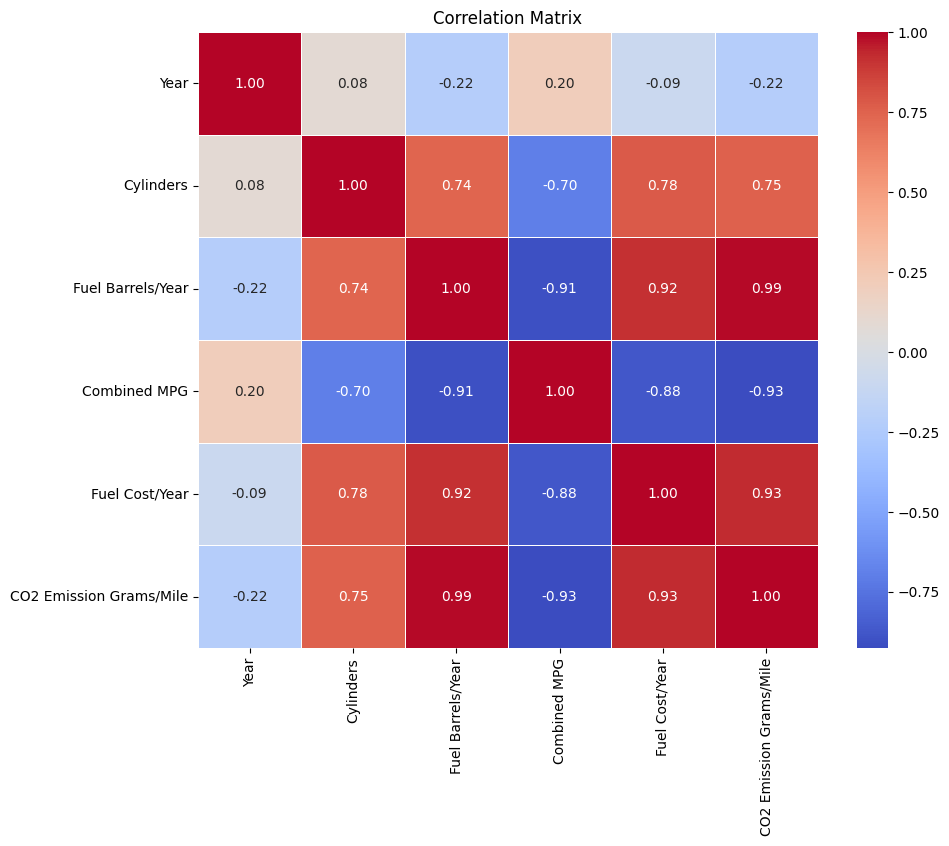

In [93]:
# Select the relevant variables
selected_variables = ['Year', 'Cylinders', 'Fuel Barrels/Year', 'Combined MPG', 'Fuel Cost/Year', 'CO2 Emission Grams/Mile']
selected_data = vehicles[selected_variables]

# Calculate correlations
correlation_matrix = selected_data.corr()

# Visualize the correlations using a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix')
plt.show()

In [102]:
# Find the most correlated features with 'CO2 Emission Grams/Mile'
target_variable = 'CO2 Emission Grams/Mile'
target_correlations = correlation_matrix[target_variable].sort_values(ascending=False)

# Display the top correlated features
most_correlated_features = target_correlations.reset_index()
most_correlated_features.columns = ['Feature', 'Correlation with CO2 Emission']
most_correlated_features = most_correlated_features[most_correlated_features['Feature'] != target_variable]

print(most_correlated_features)

             Feature  Correlation with CO2 Emission
1  Fuel Barrels/Year                       0.986189
2     Fuel Cost/Year                       0.930865
3          Cylinders                       0.752393
4               Year                      -0.222300
5       Combined MPG                      -0.926229


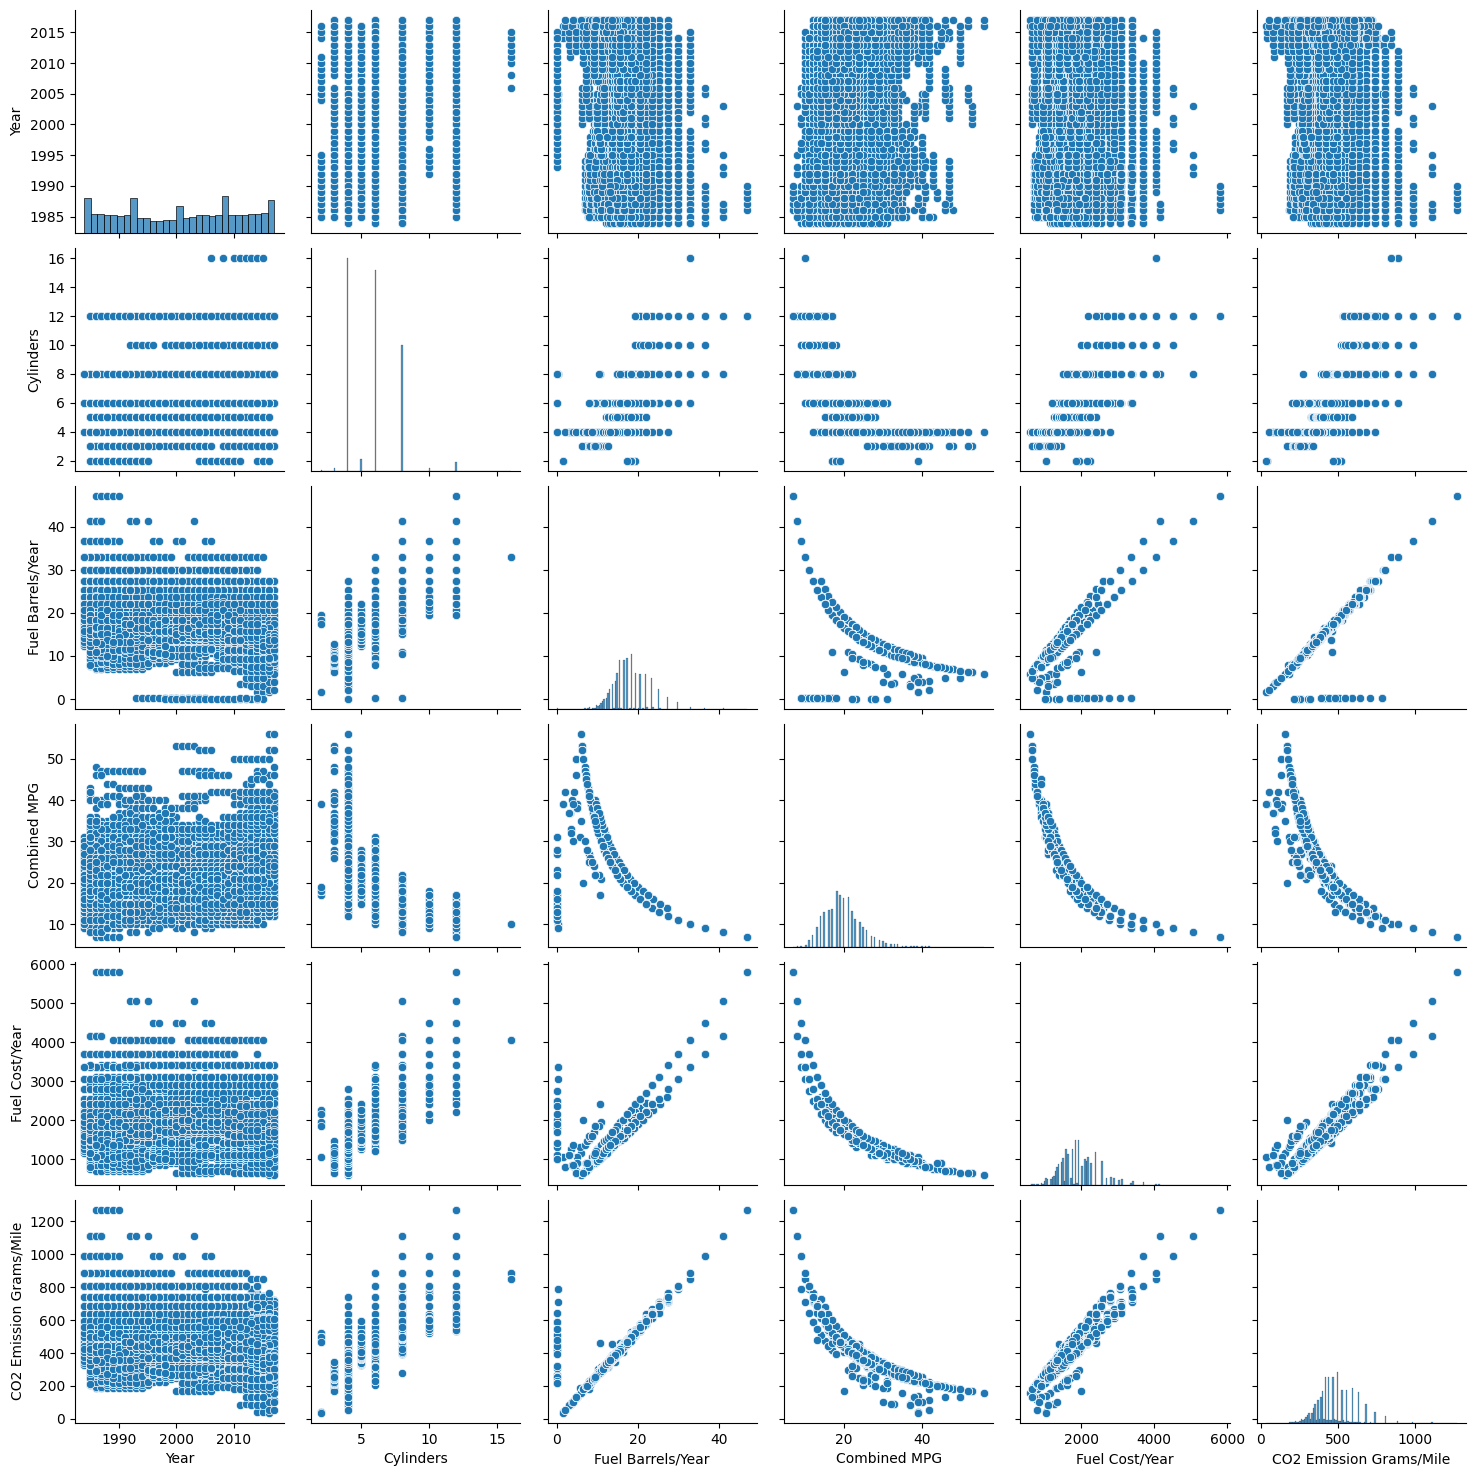

In [151]:
# Selecting the predictor variables and the target variable
selected_variables = ['Year', 'Cylinders', 'Fuel Barrels/Year', 'Combined MPG', 'Fuel Cost/Year', 'CO2 Emission Grams/Mile']
selected_data = vehicles[selected_variables]

# Create a pair plot
sns.pairplot(selected_data)
plt.show()

In [152]:
# Your response here. 
# Fuel Barrels/Year' has the highest positive correlation. This indicates that 'Fuel Barrels/Year' is the most important variable in determining CO2 emissions.


Build a regression model for this data. What type of regression are you using? Add your responses as comments after your code.

In [153]:
# Your response here. 

import statsmodels.api as sm

# Select the predictor variables (independent variables)
predictors = ['Year', 'Cylinders', 'Fuel Barrels/Year', 'Combined MPG', 'Fuel Cost/Year']
X = vehicles[predictors]

# Add a constant term to the predictors matrix (required for OLS regression)
X = sm.add_constant(X)

# Dependent variable (outcome variable)
y = vehicles['CO2 Emission Grams/Mile']

# Fit the OLS regression model
model = sm.OLS(y, X).fit()

# Display the regression summary
print(model.summary())


# The regression model for this analysis is based on Ordinary Least Squares (OLS) regression. 



                               OLS Regression Results                              
Dep. Variable:     CO2 Emission Grams/Mile   R-squared:                       0.981
Model:                                 OLS   Adj. R-squared:                  0.981
Method:                      Least Squares   F-statistic:                 3.687e+05
Date:                     Sat, 06 Jan 2024   Prob (F-statistic):               0.00
Time:                             18:01:17   Log-Likelihood:            -1.5173e+05
No. Observations:                    35952   AIC:                         3.035e+05
Df Residuals:                        35946   BIC:                         3.035e+05
Df Model:                                5                                         
Covariance Type:                 nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------

Print your regression summary, and interpret the results. What are the most important varibles in your model and why? What can conclusions can you draw from your model and how confident in these conclusions are you? Add your responses as comments after your code.

In [154]:
# Your response here. 

# Year: For each additional year of the vehicle, the CO2 emissions per mile decrease by approximately 0.3206 units. 
# This suggests that newer vehicles tend to have lower CO2 emissions.

# Cylinders: For each additional cylinder in the engine, the CO2 emissions per mile increase by approximately 1.8788 units.
# This implies that larger engines with more cylinders tend to produce higher CO2 emissions.

# Fuel Barrels/Year:A one-unit increase in fuel consumption (measured in barrels per year) is associated with an increase of approximately 19.0529 units in CO2 emissions per mile.
# This suggests a strong positive relationship, indicating that higher fuel consumption leads to higher CO2 emissions.

# Combined MPG: A one-unit increase in combined miles per gallon is associated with a decrease of approximately 3.0404 units in CO2 emissions per mile. This indicates a strong negative relationship,
#  suggesting that vehicles with higher fuel efficiency  tend to have lower CO2 emissions.

# Fuel Cost/Year: A one-unit increase in fuel cost per year is associated with a slight increase of approximately 0.0323 units in CO2 emissions per mile.
#  The impact of fuel cost on CO2 emissions is relatively small compared to other variables.

# R-squared (R²): 0.981 The model explains approximately 98.1% of the variance in CO2 emissions, indicating a very good fit.


# Conclusion:

# The most influential variables in predicting CO2 emissions are 'Fuel Barrels/Year' and 'Combined MPG.'
# Newer vehicles and those with higher fuel efficiency tend to have lower CO2 emissions.
# Larger engines with more cylinders and higher fuel consumption contribute to higher CO2 emissions.

 

## Challenge 2: Error Analysis

I am suspicious about the last few parties I have thrown: it seems that the more people I invite the more people are unable to attend. To know if my hunch is supported by data, I have decided to do an analysis. I have collected my data in the table below, where X is the number of people I invited, and Y is the number of people who attended. 

|  X |  Y |
|----|----|
| 1  |  1 |
| 3  |  2 |
| 4  |  4 |
| 6  |  4 |
| 8  |  5 |
| 9  |  7 |
| 11 |  8 |
| 14 |  13 |

We want to know if the relationship modeled by the two random variables is linear or not, and therefore if it is appropriate to model it with a linear regression. 
First, build a dataframe with the data. 

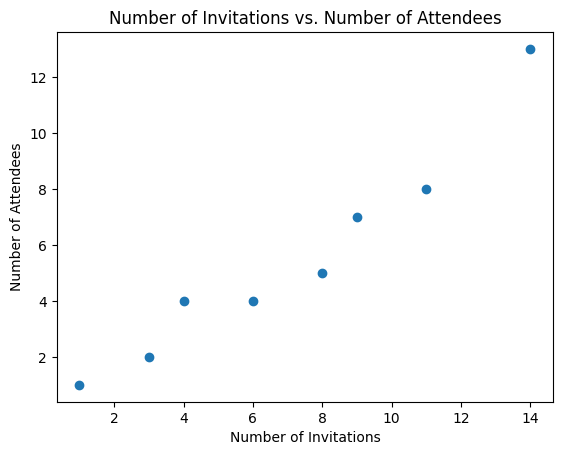

In [160]:
# Your code here.

# Data
X = [1, 3, 4, 6, 8, 9, 11, 14]
Y = [1, 2, 4, 4, 5, 7, 8, 13]

# Scatter plot
plt.scatter(X, Y)
plt.title('Number of Invitations vs. Number of Attendees')
plt.xlabel('Number of Invitations')
plt.ylabel('Number of Attendees')
plt.show()

Draw a dispersion diagram (scatter plot) for the data, and fit a regression line.

Regression Line: Y = 0.85 * X + -0.44
R-squared: 0.932
P-value: 0.00010


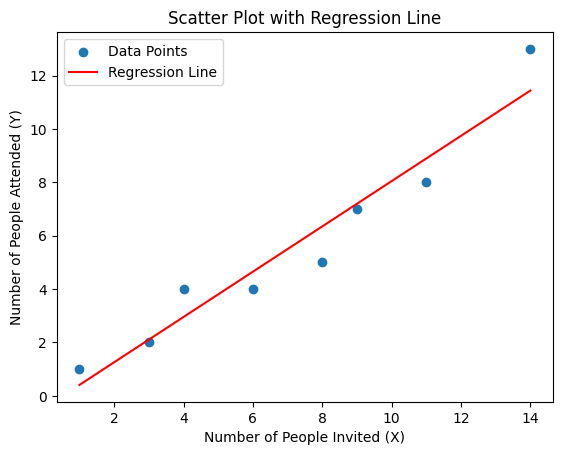

In [196]:
# Your code here.

from scipy.stats import linregress

# Fit a linear regression line
slope, intercept, r_value, p_value, std_err = linregress(X, Y)

# Print the regression results
print(f"Regression Line: Y = {slope:.2f} * X + {intercept:.2f}")
print(f"R-squared: {r_value**2:.3f}")
print(f"P-value: {p_value:.5f}")

# Create a regression line function
regression_line = lambda x: slope * x + intercept

# Generate y values for the regression line
regression_values = [regression_line(x) for x in X]

# Plot the scatter plot
plt.scatter(X, Y, label='Data Points')

# Plot the regression line
plt.plot(X, regression_values, color='red', label='Regression Line')

# Add labels and title
plt.xlabel('Number of People Invited (X)')
plt.ylabel('Number of People Attended (Y)')
plt.title('Scatter Plot with Regression Line')

# Display the legend
plt.legend()

# Show the plot
plt.show()

Regression Line: Y = 0.85 * X + -0.44
R-squared: 0.932
P-value: 0.00010


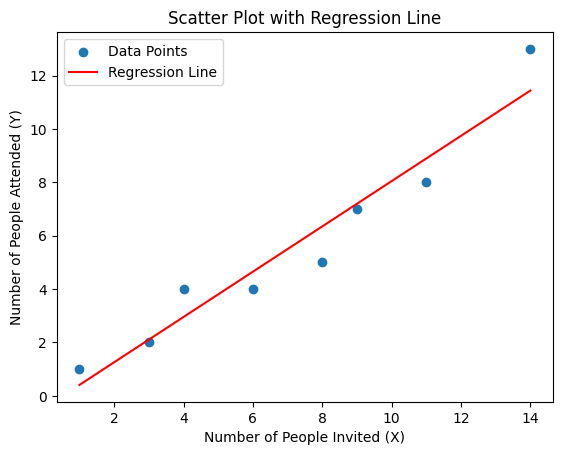

What do you see? What does this plot tell you about the likely relationship between the variables? Print the results from your regression.



In [197]:
# Your response here. 
# The scatter plot shows a general trend that as the number of people invited (X) increases, the number of people attended (Y) also tends to increase. 
# This suggests a positive relationship between the variables.

# The regression analysis, based on the provided data, does not support the original hypothesis. Instead, it suggests a positive relationship between the number of invitations
# and the number of attendees. If the original suspicion was that more invitations result in more people being unable to attend, the data contradicts this notion.

Do you see any problematic points, or outliers, in your data? Remove these points and recalculate your regression. Print the new dispersion diagram with your new model and the results of your model. 

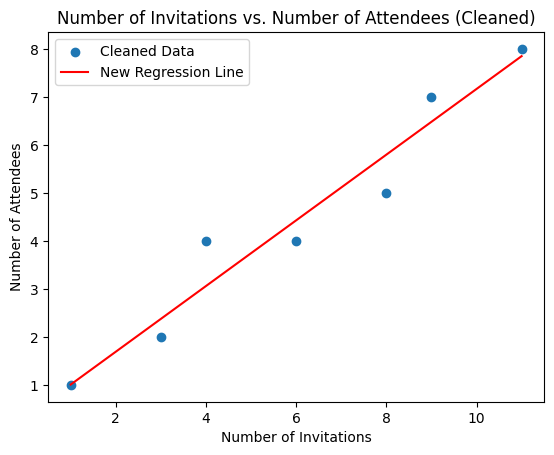

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.943
Model:                            OLS   Adj. R-squared:                  0.932
Method:                 Least Squares   F-statistic:                     83.31
Date:                Sat, 06 Jan 2024   Prob (F-statistic):           0.000264
Time:                        18:24:06   Log-Likelihood:                -5.7771
No. Observations:                   7   AIC:                             15.55
Df Residuals:                       5   BIC:                             15.45
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.3233      0.513      0.630      0.5

c:\Users\diana\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\stats\stattools.py:74: ValueWarning: omni_normtest is not valid with less than 8 observations; 7 samples were given.
  warn("omni_normtest is not valid with less than 8 observations; %i "


In [209]:
# Your response here. 

from scipy.stats import zscore

# Calculate Z-scores
z_scores = zscore(Y)

# Set a Z-score threshold to identify outliers
threshold = 2

# Find indices of outliers
outlier_indices = np.where(np.abs(z_scores) > threshold)

# Remove outliers
X_cleaned = np.delete(X, outlier_indices)
Y_cleaned = np.delete(Y, outlier_indices)

# Scatter plot of cleaned data
plt.scatter(X_cleaned, Y_cleaned, label='Cleaned Data')
plt.title('Number of Invitations vs. Number of Attendees (Cleaned)')
plt.xlabel('Number of Invitations')
plt.ylabel('Number of Attendees')

# Fit a new linear regression line
slope_cleaned, intercept_cleaned, _, _, _ = linregress(X_cleaned, Y_cleaned)
regression_line_cleaned = lambda x: slope_cleaned * x + intercept_cleaned

# Generate y values for the new regression line
regression_values_cleaned = [regression_line_cleaned(x) for x in X_cleaned]

# Plot the new regression line
plt.plot(X_cleaned, regression_values_cleaned, color='red', label='New Regression Line')

# Display the legend
plt.legend()

# Show the plot
plt.show()

# Fit a new linear regression model with cleaned data
model_cleaned = sm.OLS(Y_cleaned, sm.add_constant(X_cleaned)).fit()

# Display the regression summary for the cleaned data
print(model_cleaned.summary())

What changed? Based on the results of the two models and your graphs, what can you say about the form of the data with the problematic point and without it?

In [210]:
# # Your response here. 
# The removal of outliers resulted in an increase in the coefficient of determination, indicating a stronger explanation of the variability in Y by the model.